In [1]:
import sys 
sys.path.append('../../')
sys.path.append('../../../')

from utils.counting_utils import * 
from utils.plotting_utils import * 

base_params = {
    'C':2,
    'C_1':0,
    'eps':0.01,
    'max_num_train_pts':200,
    'max_num_val_pts':4000,
    'seed_frac':0.2,
    'query_batch_frac':0.05,
    'method':'tbal'
}

root_pfx = '../../outputs/unit_ball_runs_5'

lst_outs = get_all_outs_for_exp(root_pfx)


../../outputs/unit_ball_runs_5/C__2/C_1__0/eps__0.005/max_num_train_pts__500/max_num_val_pts__3600/method__active_learning/query_batch_frac__0.05/seed__0/seed_frac__0.2/active_learning.pkl
../../outputs/unit_ball_runs_5/C__2/C_1__0/eps__0.005/max_num_train_pts__500/max_num_val_pts__3600/method__active_learning/query_batch_frac__0.05/seed__49/seed_frac__0.2/active_learning.pkl
../../outputs/unit_ball_runs_5/C__2/C_1__0/eps__0.005/max_num_train_pts__500/max_num_val_pts__3600/method__active_learning/query_batch_frac__0.05/seed__42/seed_frac__0.2/active_learning.pkl
../../outputs/unit_ball_runs_5/C__2/C_1__0/eps__0.005/max_num_train_pts__500/max_num_val_pts__3600/method__active_learning/query_batch_frac__0.05/seed__14/seed_frac__0.2/active_learning.pkl
../../outputs/unit_ball_runs_5/C__2/C_1__0/eps__0.005/max_num_train_pts__500/max_num_val_pts__3600/method__active_learning/query_batch_frac__0.05/seed__28/seed_frac__0.2/active_learning.pkl
../../outputs/unit_ball_runs_5/C__2/C_1__0/eps__0.0

In [2]:

def get_numbers_for_param_2(lst_outs,base_params,param, param_vals):
    out = defaultdict(list)

    for n in param_vals:
        
        print(n)
        params = copy.deepcopy(base_params)

        params[param] = n
        df_1 = pd.DataFrame(lst_outs)
        
        params['method'] = 'tbal'
        #filterd_outs = filter_outputs(lst_outs,params)

        #df = pd.DataFrame(filterd_outs)
        df = filter_outputs_2(df_1,params)
        #print(df['sel_auto_labeled_acc'].mean())
        #print(df['sel_coverage'].mean())
        out['TBAL_sel_err_mean'].append(1- df['sel_auto_labeled_acc'].mean())
        out['TBAL_sel_err_max'].append(1- df['sel_auto_labeled_acc'].min())
        out['TBAL_sel_err_std'].append(df['sel_auto_labeled_acc'].std())
        out['TBAL_sel_cov_mean'].append(df['sel_coverage'].mean())
        out['TBAL_sel_cov_std'].append(df['sel_coverage'].std())

    for k in out.keys():
        out[k] = np.array(out[k])

    return out 

In [3]:
from math import log , sqrt 
def error_bound(n_v,n_a,d,delta=0.3,p_0=1,k=10):
    return (1/p_0)*sqrt( (1/n_v)*( d* log(n_v/d) + log(1/delta)) ) + sqrt(1/n_a *( d* log(n_a/d) + log(1/delta))) + 0.01

#lst_n_v = np.arange(100,2000, 100)
lst_n_val    = [100,400,800,1200,1600,2000,2400,2800,3200,3600,4000] 

n_a = 10000
d = 30
z = [error_bound(n_v,n_a,d) for n_v in lst_n_val]
print(z)

[0.7533950202266632, 0.5866303065898795, 0.4955022067906891, 0.44779638767097807, 0.4169003706117206, 0.39465378014883656, 0.37757879577239856, 0.3638996653116275, 0.3525985504592174, 0.3430428863518413, 0.33481525194546247]


In [4]:
#lst_n_q      = [100,150,200,250,300,400,500,600,700,800,900,1000]

lst_n_q      = [500]
base_params['max_num_train_pts'] = lst_n_q[0]
base_params['C_1'] = 0


xticks = [800,1600,2400,3200,4000]
xtick_lbls = ["0.8K","1.6K",'2.4K','3.2K','4K'] 
#xticks = ['4K', '5K','6K','7K','8K','9K']

base_params['max_num_train_pts'] = lst_n_q[0]
eps = 0.01
c1 = 0.25
base_params['C_1'] = c1
base_params['eps'] = eps 

out = get_numbers_for_param(lst_outs,base_params,'max_num_val_pts',lst_n_val)
df = pd.DataFrame(out)

plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 1.5

lgd=True

#title = f'Error Threshold = {eps*100}% , UCB $C_1$={c1}'
title =None 


base_params['C_1'] = 0
base_params['eps'] = eps 

out = get_numbers_for_param_2(lst_outs,base_params,'max_num_val_pts',lst_n_val)
df = pd.DataFrame(out)
#save_path =f"../../outputs/plots/unitball_val_eps_{eps}_c1_{c1}_nq_{base_params['max_num_train_pts']}_'lgd_{lgd}_2'.pdf"
#title = f'Error Threshold = {eps*100}% , UCB $C_1$={c1}'
title =None 
out 

100
400
800
1200
1600
2000
2400
2800
3200
3600
4000


defaultdict(list,
            {'TBAL_sel_err_mean': array([0.03512947, 0.01909151, 0.01687971, 0.01413001, 0.01411672,
                    0.01302389, 0.0125488 , 0.0122719 , 0.01276823, 0.01244309,
                    0.01261386]),
             'TBAL_sel_err_max': array([0.07718672, 0.03279431, 0.02472282, 0.01772774, 0.01882155,
                    0.02250949, 0.01917546, 0.01942806, 0.01851497, 0.01794905,
                    0.01811059]),
             'TBAL_sel_err_std': array([0.01860347, 0.00640758, 0.00452097, 0.00261282, 0.00235928,
                    0.00423624, 0.00311145, 0.00344756, 0.00263013, 0.00250675,
                    0.00241681]),
             'TBAL_sel_cov_mean': array([0.725475  , 0.9384    , 0.96988125, 0.9662625 , 0.97164375,
                    0.96885   , 0.97300625, 0.97590625, 0.9758625 , 0.97520625,
                    0.9762375 ]),
             'TBAL_sel_cov_std': array([0.10152314, 0.02232626, 0.0083889 , 0.01059509, 0.0048569 ,
                    0.00

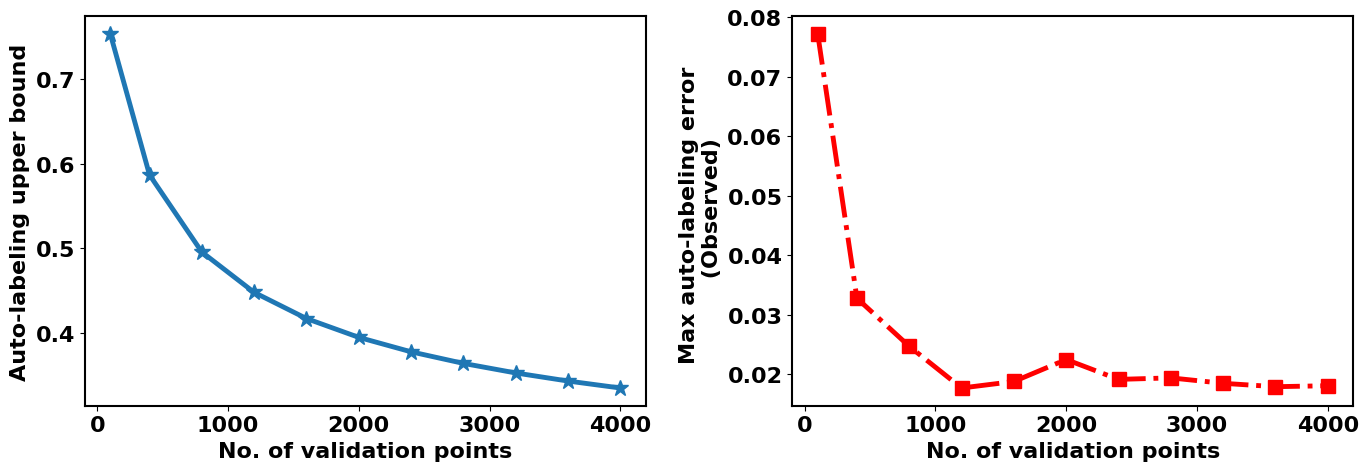

In [6]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.linewidth'] = 1.5

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,5))

ax1.plot(lst_n_val, z,marker='*',markersize=12, linewidth=3.5, linestyle='-')
#ax1.grid()
#ax1.plot(lst_n_val, out['ALBL_sel_err_max'],marker='x')
ax2.plot(lst_n_val, out['TBAL_sel_err_max'],marker='s',markersize=10,color='red', linewidth=3.5, linestyle='-.')
#ax2.plot(lst_n_val, out['ALBL_sel_err_mean'],marker='x')

ax1.set_xlabel('No. of validation points', weight='bold')

ax2.set_xlabel('No. of validation points', weight='bold')

ax1.set_ylabel('Auto-labeling upper bound', weight='bold')

ax2.set_ylabel('Max auto-labeling error \n (Observed)', weight='bold')

plt.tight_layout()
#plt.grid()

plt.savefig('../../plots/bounds_comparison-2.pdf',dpi=200, transparent=False, bbox_inches='tight')

#plt.yscale('log') 